In [2]:
import os
import pandas as pd
import time
import numpy as np
from sklearn import svm
import time
from sklearn import metrics
from sklearn.externals import joblib

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
df = pd.read_csv(r"D:\1091\行銷數據分析\新資料集\train0102.csv")
#df = df.drop(labels=['ssid','play_mode'],axis='columns')  # 去除部分欄位
df

,view_50or_click,hour,Pre-roll,Mobile,App,spp,conntype_cable,conntype_cellular,conntype_other,bsn_chrome,...,bsn_safari,accept_lang_1,accept_lang_2,accept_lang_3,word,weekend,last,igs,plaid,type
0,1,0,0,0,0,1.000000,1,0,0,1,...,0,0,1,0,-7.504634,0,1,-0.304765,0.052549,0.218102
1,1,0,1,0,0,0.000000,0,1,0,1,...,0,0,1,0,-0.143376,0,1,0.000000,0.327470,0.446993
2,1,0,1,0,0,0.000000,1,0,0,1,...,0,0,1,0,-0.143376,0,1,0.000000,0.327470,0.446993
3,1,0,0,1,0,0.308992,0,1,0,1,...,0,0,1,0,-4.242806,0,0,-2.696043,0.000000,0.000000
4,1,0,1,0,0,0.000000,1,0,0,0,...,0,1,0,0,-0.143376,0,1,0.000000,0.327470,0.446993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135138,0,3,0,1,0,0.000000,1,0,0,0,...,1,1,0,0,-5.779571,1,1,0.000000,-0.547020,-0.039568
135139,0,3,0,1,0,0.000000,0,1,0,0,...,1,1,0,0,-9.205511,1,1,-0.087442,-0.479072,-0.286925
135140,1,3,0,1,0,0.000000,0,1,0,1,...,0,0,1,0,-0.143376,1,1,0.000000,0.113170,0.534621
135141,0,3,0,1,0,0.797237,1,0,0,0,...,0,1,0,0,-3.919532,1,1,0.070426,-0.497355,-0.034064


In [5]:
x = [i for i in df.columns if i not in ["view_50or_click"]] 
X_train = df[x]
y_train = df[["view_50or_click"]]  

In [4]:
df2 = pd.read_csv(r"D:\1091\行銷數據分析\新資料集\verify0102.csv")
# df2 = df2.drop(labels=['ssid','play_mode'],axis='columns')  # 去除部分欄位
df2

,view_50or_click,hour,Pre-roll,Mobile,App,spp,conntype_cable,conntype_cellular,conntype_other,bsn_chrome,...,bsn_safari,accept_lang_1,accept_lang_2,accept_lang_3,word,weekend,last,igs,plaid,type
0,0,0,0,1,0,0.0,1,0,0,0,...,1,1,0,0,-11.807820,0,1,-0.892218,-0.547814,-0.340238
1,0,0,0,1,0,0.0,1,0,0,0,...,1,1,0,0,-10.517585,0,1,0.000000,-0.547814,-0.340238
2,0,0,0,1,0,0.0,1,0,0,0,...,1,1,0,0,-9.558019,0,1,0.000000,-0.547814,-0.340238
3,0,0,0,1,0,0.0,1,0,0,0,...,1,1,0,0,-5.423898,0,1,0.000000,-0.560229,0.218102
4,0,0,0,1,0,0.0,1,0,0,0,...,1,1,0,0,-4.077650,0,1,-0.366525,-0.560229,0.218102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51610,0,23,0,1,0,0.0,0,1,0,1,...,0,0,1,0,-6.394934,0,1,-3.883102,-0.575591,-0.039568
51611,0,23,0,1,0,0.0,1,0,0,1,...,0,0,1,0,-4.121903,0,1,-2.882794,-0.575591,-0.039568
51612,0,23,0,1,0,0.0,0,1,0,1,...,0,0,1,0,-3.574451,0,1,0.212419,-0.575591,-0.039568
51613,0,23,0,1,0,0.0,0,1,0,0,...,1,1,0,0,-8.900700,0,1,0.000000,-0.575591,-0.039568


In [6]:
x_v = [i for i in df2.columns if i not in ["view_50or_click"]] 
X_verify = df2[x_v]
y_verify = df2[["view_50or_click"]]  

### ===========below nuSVC========

In [7]:
from sklearn.svm import NuSVC
clf = NuSVC()
start_time = time.time()
clf.fit(X_train, y_train.values.ravel())

print("fitting took{}seconds".format(time.time()-start_time))

fitting took1287.8501901626587seconds


In [8]:
#Predict the response for test dataset
start_time = time.time()
clf_pred = clf.predict(X_verify) # verify

print("fitting took{}seconds".format(time.time()-start_time))

print("Accuracy:",metrics.accuracy_score(y_verify, clf_pred))

#################################

#  Accuracy: 0.7649452708391805

#################################

fitting took103.52195715904236seconds
Accuracy: 0.7811295166133876


In [9]:
clf

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)

In [18]:
# 儲存模型
joblib.dump(clf,'nuSVM0101newdata.pkl')  # 儲存模型

# saved_model_SVM0101 = joblib.load('SVM_B.pkl') # 重新呼叫fit好的模型

['nuSVM0101newdata.pkl']

In [10]:
# train accuracy for nuSVM
clf_pred_train = clf.predict(X_train)


crosstab = pd.crosstab(y_train.values.ravel(),clf_pred_train, rownames=['Ture labels'], colnames=['prediction'])

a = int(crosstab[0][:1])
b = int(crosstab[1][:1])
c = int(crosstab[0][1:])
d = int(crosstab[1][1:])
precision = a/(a+b)
recall = a/(a+c)
accuracy = (a+d)/(a+b+c+d)

print(crosstab)

print('precision:',round(precision,3))
print('recall：',round(recall,3))
print('accuracy：',round(accuracy,3))

prediction       0      1
Ture labels              
0            47141  13750
1            14397  59855
precision: 0.774
recall： 0.766
accuracy： 0.792


In [14]:
# 匯出預測結果：train！
clf_pred_train = pd.DataFrame(clf_pred_train)

clf_pred_train.to_csv(r"D:\1091\行銷數據分析\新資料集\test0102nuSVM_train結果.csv")

In [ ]:
########################################

In [11]:
# verify accuracy for nuSVM

crosstab = pd.crosstab(y_verify.values.ravel(),clf_pred, rownames=['Ture labels'], colnames=['prediction'])

a = int(crosstab[0][:1])
b = int(crosstab[1][:1])
c = int(crosstab[0][1:])
d = int(crosstab[1][1:])
precision = a/(a+b)
recall = a/(a+c)
accuracy = (a+d)/(a+b+c+d)

print(crosstab)

print('precision:',round(precision,3))
print('recall：',round(recall,3))
print('accuracy：',round(accuracy,3))

prediction       0      1
Ture labels              
0            18143   4965
1             6332  22175
precision: 0.785
recall： 0.741
accuracy： 0.781


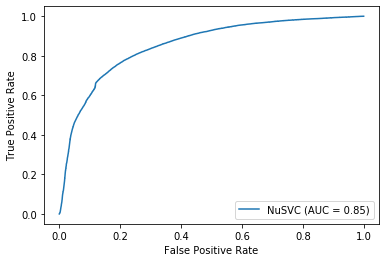

In [35]:
metrics.plot_roc_curve(clf, X_verify, y_verify)  


In [15]:
# 匯出預測結果：verify！
clf_pred = pd.DataFrame(clf_pred)

clf_pred.to_csv(r"D:\1091\行銷數據分析\新資料集\test0102nuSVM_verify結果.csv")

In [ ]:
###############################################

In [16]:
# 預測test dataset
test = pd.read_csv(r"D:\1091\行銷數據分析\新資料集\test0102.csv")
#B_test =B_test.drop(labels=['ssid','play_mode'],axis='columns')  # 去除部分欄位
test


,No.,hour,Pre-roll,Mobile,App,spp,conntype_cable,conntype_cellular,conntype_other,bsn_chrome,...,bsn_safari,accept_lang_1,accept_lang_2,accept_lang_3,word,weekend,last,igs,plaid,type
0,1,0,0,1,0,0.0,0,1,0,1,...,0,0,1,0,-8.297681,0,1,-1.701145,0.0,0.0
1,2,0,0,1,0,0.0,1,0,0,0,...,1,1,0,0,-7.360429,0,1,-0.909654,0.0,0.0
2,3,0,0,1,0,0.0,0,1,0,1,...,0,0,1,0,-6.659406,0,1,-0.121846,0.0,0.0
3,4,0,0,1,0,0.0,0,1,0,0,...,1,1,0,0,-7.653901,0,1,-4.138474,0.0,0.0
4,5,0,0,1,0,0.0,0,1,0,0,...,1,1,0,0,-4.846375,0,1,-0.958864,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50794,50795,23,0,1,0,0.0,0,1,0,0,...,0,0,1,0,-6.901532,0,1,-0.517558,0.0,0.0
50795,50796,23,0,1,0,0.0,0,1,0,0,...,1,1,0,0,-2.604873,0,1,0.000000,0.0,0.0
50796,50797,23,0,1,0,0.0,0,1,0,1,...,0,0,1,0,-10.797960,0,1,0.000000,0.0,0.0
50797,50798,23,0,1,0,0.0,1,0,0,0,...,1,1,0,0,-5.045751,0,1,0.183937,0.0,0.0


In [18]:
out = [i for i in test.columns if i not in ["No."]] 
test= test[out]
test

,hour,Pre-roll,Mobile,App,spp,conntype_cable,conntype_cellular,conntype_other,bsn_chrome,bsn_other,bsn_safari,accept_lang_1,accept_lang_2,accept_lang_3,word,weekend,last,igs,plaid,type
0,0,0,1,0,0.0,0,1,0,1,0,0,0,1,0,-8.297681,0,1,-1.701145,0.0,0.0
1,0,0,1,0,0.0,1,0,0,0,0,1,1,0,0,-7.360429,0,1,-0.909654,0.0,0.0
2,0,0,1,0,0.0,0,1,0,1,0,0,0,1,0,-6.659406,0,1,-0.121846,0.0,0.0
3,0,0,1,0,0.0,0,1,0,0,0,1,1,0,0,-7.653901,0,1,-4.138474,0.0,0.0
4,0,0,1,0,0.0,0,1,0,0,0,1,1,0,0,-4.846375,0,1,-0.958864,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50794,23,0,1,0,0.0,0,1,0,0,1,0,0,1,0,-6.901532,0,1,-0.517558,0.0,0.0
50795,23,0,1,0,0.0,0,1,0,0,0,1,1,0,0,-2.604873,0,1,0.000000,0.0,0.0
50796,23,0,1,0,0.0,0,1,0,1,0,0,0,1,0,-10.797960,0,1,0.000000,0.0,0.0
50797,23,0,1,0,0.0,1,0,0,0,0,1,1,0,0,-5.045751,0,1,0.183937,0.0,0.0


In [19]:
clf_test = clf.predict(test)

In [20]:
# 匯出預測結果
clf_test = pd.DataFrame(clf_test)

clf_test.to_csv(r"D:\1091\行銷數據分析\新資料集\test結果.csv")

### ===========above nuSVC========

### 下面SVM先不要執行了

In [ ]:
#SVM model
#Create a svm Classifier

SVM = svm.SVC(C=10, kernel="rbf", gamma=0.1)

# fit model by all columns
# Train the model using the training sets
start_time = time.time()
SVM.fit(X_train, y_train.values.ravel())

print("fitting took{}seconds".format(time.time()-start_time))


In [ ]:
#Predict the response for test dataset
start_time = time.time()
y_pred_SVM = SVM.predict(X_verify)

print("fitting took{}seconds".format(time.time()-start_time))

print("Accuracy:",metrics.accuracy_score(y_verify, y_pred_SVM))

#################################

#  Accuracy: 0.7982756950498886

#################################

In [16]:
# 儲存模型
joblib.dump(SVM,'SVM0101newdata.pkl')  # 儲存模型

# saved_model_SVM0101 = joblib.load('SVM_B.pkl') # 重新呼叫fit好的模型

['SVM0101newdata.pkl']

In [ ]:
# verify accuracy for SVM


crosstab = pd.crosstab(y_verify.values.ravel(),y_pred_SVM, rownames=['Ture labels'], colnames=['prediction'])

a = int(crosstab[0][:1])
b = int(crosstab[1][:1])
c = int(crosstab[0][1:])
d = int(crosstab[1][1:])
precision = a/(a+b)
recall = a/(a+c)
accuracy = (a+d)/(a+b+c+d)

print(crosstab)

print('precision:',round(precision,3))
print('recall：',round(recall,3))
print('accuracy：',round(accuracy,3))

In [ ]:
# train accuracy for nuSVM

y_pred_SVM_train = SVM.predict(X_train)

crosstab = pd.crosstab(y_train.values.ravel(),y_pred_SVM_train, rownames=['Ture labels'], colnames=['prediction'])

a = int(crosstab[0][:1])
b = int(crosstab[1][:1])
c = int(crosstab[0][1:])
d = int(crosstab[1][1:])
precision = a/(a+b)
recall = a/(a+c)
accuracy = (a+d)/(a+b+c+d)

print(crosstab)

print('precision:',round(precision,3))
print('recall：',round(recall,3))
print('accuracy：',round(accuracy,3))